<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 4 Sprint 3 Assignment 1*

# Recurrent Neural Networks and Long Short Term Memory (LSTM)

![Monkey at a typewriter](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3c/Chimpanzee_seated_at_typewriter.jpg/603px-Chimpanzee_seated_at_typewriter.jpg)

It is said that [infinite monkeys typing for an infinite amount of time](https://en.wikipedia.org/wiki/Infinite_monkey_theorem) will eventually type, among other things, the complete works of Wiliam Shakespeare. Let's see if we can get there a bit faster, with the power of Recurrent Neural Networks and LSTM.

This text file contains the complete works of Shakespeare: https://www.gutenberg.org/files/100/100-0.txt

Use it as training data for an RNN - you can keep it simple and train character level, and that is suggested as an initial approach.

Then, use that trained RNN to generate Shakespearean-ish text. Your goal - a function that can take, as an argument, the size of text (e.g. number of characters or lines) to generate, and returns generated text of that size.

Note - Shakespeare wrote an awful lot. It's OK, especially initially, to sample/use smaller data and parameters, so you can have a tighter feedback loop when you're trying to get things running. Then, once you've got a proof of concept - start pushing it more!

In [1]:
import requests
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.callbacks import LambdaCallback
from tensorflow.keras.optimizers import RMSprop

In [2]:
import numpy as np
import random
import sys
import os

In [3]:
data = []
with open("shakespeare.txt", 'r', encoding='utf-8') as f:
    data.append(f.read())

In [48]:
data[0][:500]

'\ufeff\nProject Gutenberg’s The Complete Works of William Shakespeare, by William\nShakespeare\n\nThis eBook is for the use of anyone anywhere in the United States and\nmost other parts of the world at no cost and with almost no restrictions\nwhatsoever.  You may copy it, give it away or re-use it under the terms\nof the Project Gutenberg License included with this eBook or online at\nwww.gutenberg.org.  If you are not located in the United States, you’ll\nhave to check the laws of the country where you are l'

In [4]:
text = " ".join(data)

# Unique Characters
chars = list(set(text))

# Lookup Tables
char_int = {c:i for i, c in enumerate(chars)} 
int_char = {i:c for i, c in enumerate(chars)} 

# Here's where we'd replace text with tokenizing text if we wanted to do the dict 
# over words, not just characters.

In [5]:
maxlen = 50
step = 5

encoded = [char_int[c] for c in text]

sequences = [] # Each element is 40 chars long
next_char = [] # One element for each sequence

for i in range(0, len(encoded) - maxlen, step):
    
    sequences.append(encoded[i : i + maxlen])
    next_char.append(encoded[i + maxlen])
    
print('sequences: ', len(sequences))

x = np.zeros((len(sequences), maxlen, len(chars)), dtype=np.bool)
y = np.zeros((len(sequences),len(chars)), dtype=np.bool)

for i, sequence in enumerate(sequences):
    for t, char in enumerate(sequence):
        x[i,t,char] = 1
        
    y[i, next_char[i]] = 1

sequences:  1114621


In [7]:
#sequences = sequences[:100000]

In [6]:
x = np.zeros((len(sequences), maxlen, len(chars)), dtype=np.bool)
y = np.zeros((len(sequences),len(chars)), dtype=np.bool)

for i, sequence in enumerate(sequences):
    for t, char in enumerate(sequence):
        x[i,t,char] = 1
        
    y[i, next_char[i]] = 1

In [7]:
model = Sequential()
# embedding if words model. maybe should embed here anyways? how would this affect things?
model.add(LSTM(512, input_shape=(maxlen, len(chars)), dropout=.2))
model.add(Dense(len(chars), activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam')

from tensorflow.keras.layers import CuDNNLSTM

The error was because from TensorFlow 2 you do not need to specify CuDNNLSTM. You can just use LSTM with no activation function and it will automatically use the CuDNN version. You do have to install CuDNN first.

In [8]:
def sample(preds):
    # helper function to sample an index from a probability array
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / 1
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

In [9]:
def on_epoch_end(epoch, _):
    # Function invoked at end of each epoch. Prints generated text.
    
    print()
    print('----- Generating text after Epoch: %d' % epoch)
    
    start_index = random.randint(0, len(text) - maxlen - 1)
    
    generated = ''
    
    sentence = text[start_index: start_index + maxlen]
    generated += sentence
    
    print('----- Generating with seed: "' + sentence + '"')
    sys.stdout.write(generated)
    
    for i in range(400):
        x_pred = np.zeros((1, maxlen, len(chars)))
        for t, char in enumerate(sentence):
            x_pred[0, t, char_int[char]] = 1
            
        preds = model.predict(x_pred, verbose=0)[0]
        next_index = sample(preds)
        next_char = int_char[next_index]
        
        sentence = sentence[1:] + next_char
        
        sys.stdout.write(next_char)
        sys.stdout.flush()
    print()


print_callback = LambdaCallback(on_epoch_end=on_epoch_end)

In [10]:
model.fit(x, y,
          batch_size=2000,
          epochs=15,
          callbacks=[print_callback])

Train on 1114621 samples
Epoch 1/15
1114000/1114621 [============================>.] - ETA: 0s - loss: 2.7559
----- Generating text after Epoch: 0
----- Generating with seed: "r- alas! you see how 'tis- a little o'erparted. Bu"
r- alas! you see how 'tis- a little o'erparted. BuHKSè. S
AL RALEO.
WheGuts of biung te aich—u ane mer
n  ia poom sf'e you  wome
itest ard Padey f ou gaved.  WAtS BERSESGHeSEREByUMHAMAN.
Whereard, youl  agras  c youg;
Ua nit tor spric.  e tof orirher  titibe seo tiengr?
PIMLTR.
No mempsteu ndlqumsngstelf an here shar. hon whise hoolq;ist bn   he tara s
    BrEs.. S IORDUSO.
Wher bware ed  houch sue
t y lorrhbe duque: oo lothay thisves ee’b rat, t
1114621/1114621 [==============================] - 237s 212us/sample - loss: 2.7558
Epoch 2/15
1114000/1114621 [============================>.] - ETA: 0s - loss: 2.2982
----- Generating text after Epoch: 1
----- Generating with seed: "
ALICE.
De nails, _madame._

KATHARINE.
De nails, "

ALICE.
De nails, _madame._

KATHA

Use partially trained model to train more!

In [13]:
maxlen = 40
step = 5

encoded = [char_int[c] for c in text]

sequences = [] # Each element is 40 chars long
next_char = [] # One element for each sequence

for i in range(0, len(encoded) - maxlen, step):
    
    sequences.append(encoded[i : i + maxlen])
    next_char.append(encoded[i + maxlen])
    
print('sequences: ', len(sequences))

x = np.zeros((len(sequences), maxlen, len(chars)), dtype=np.bool)
y = np.zeros((len(sequences),len(chars)), dtype=np.bool)

for i, sequence in enumerate(sequences):
    for t, char in enumerate(sequence):
        x[i,t,char] = 1
        
    y[i, next_char[i]] = 1

sequences:  1114623


In [14]:
model.fit(x, y,
          batch_size=2000,
          epochs=15,
          callbacks=[print_callback])

Train on 1114623 samples
Epoch 1/15
1114000/1114623 [============================>.] - ETA: 0s - loss: 2.4279
----- Generating text after Epoch: 0
----- Generating with seed: " our seeing, goe we hence,
Right joyfull"
 our seeing, goe we hence,
Right joyfull a pratt, yas nge; ghell
     Thes soor my uame in wole hent cooi wid.

THKOGA.
PSor arg'grelt
    ir is  mout a’d thev din cringom oulitis; ary;  n arith m srarsels? Sou’s mo, ank hateatis qury;

 _UHICEL._]athy, aWsme wov'e sblbt bar; ar Myse nitherd INisks'nd,

    houzheclsenth woucurt, orv, thange tit
yam norm whall ofh, wher, peary;
hy oul as whing aulesi he sesto  numgh,
 T  nin to sa fase 
1114623/1114623 [==============================] - 51s 46us/sample - loss: 2.4278
Epoch 2/15
1114000/1114623 [============================>.] - ETA: 0s - loss: 2.3261
----- Generating text after Epoch: 1
----- Generating with seed: "on the instant that she was accus’d,
   "
on the instant that she was accus’d,
    shit mbelir ly. Lelly ham

# Resources and Stretch Goals

Reproduce Lecture

In [15]:
from __future__ import print_function

from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.datasets import imdb

In [16]:
max_features = 20000
maxlen = 80
batch_size = 100

In [17]:
print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

Loading data...


In [18]:
print(len(x_train))

25000


In [19]:
x_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 19193,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 10311,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 12118,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,

Next step is to create universal input length so that everything is the same dimension for our model. For this, we use the pad_sequences method from Keras preprocessing in order to cut sequences above the max length down to it and add 0s to bring sequences up to the same length.

In [20]:
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print(x_train.shape)
print(x_test.shape)

(25000, 80)
(25000, 80)


Each of our observations is now a vector with length 80, where each element in the vector is essentially a one-hot encoding over a 20000-word vocabulary. What the embedding layer does is vectorize all this down into dense vectors in n dimensions. (Although it will look like it's adding dimensions, as each element of x_train will now be a series of 80 n-dimensional vectors.) 

Conventional LSTM models only have one LSTM layer before passing it to a dense layer to get output.

In [22]:
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=.2, recurrent_dropout=.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         2560000   
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 2,691,713
Trainable params: 2,691,713
Non-trainable params: 0
_________________________________________________________________


In [23]:
saved_model = model.fit(x_train, y_train,
                       batch_size=400,
                       epochs=10,
                       validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 24s 953us/sample - loss: 0.5400 - accuracy: 0.7244 - val_loss: 0.3752 - val_accuracy: 0.8348
Epoch 2/10
25000/25000 [==============================] - 22s 864us/sample - loss: 0.3147 - accuracy: 0.8721 - val_loss: 0.3826 - val_accuracy: 0.8346
Epoch 3/10
25000/25000 [==============================] - 21s 839us/sample - loss: 0.2430 - accuracy: 0.9056 - val_loss: 0.3852 - val_accuracy: 0.8296
Epoch 4/10
25000/25000 [==============================] - 21s 822us/sample - loss: 0.2061 - accuracy: 0.9244 - val_loss: 0.4429 - val_accuracy: 0.8259
Epoch 5/10
25000/25000 [==============================] - 20s 816us/sample - loss: 0.1699 - accuracy: 0.9388 - val_loss: 0.4870 - val_accuracy: 0.8204
Epoch 6/10
25000/25000 [==============================] - 19s 778us/sample - loss: 0.1342 - accuracy: 0.9546 - val_loss: 0.5502 - val_accuracy: 0.8177
Epoch 7/10
25000/25000 [====================

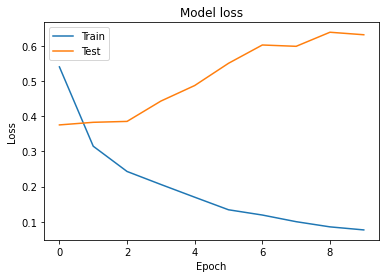

In [25]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(saved_model.history['loss'])
plt.plot(saved_model.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show();

In [26]:
from tensorflow.keras.callbacks import LambdaCallback
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import RMSprop

import numpy as np
import random
import sys
import os

In [27]:
data_files = os.listdir('./articles')

In [28]:
data = []

for file in data_files:
    if file[-3:] == 'txt':
        with open(f'./articles/{file}', 'r', encoding='utf-8') as f:
            data.append(f.read())

NameError: name 'tensorflow' is not defined

## Stretch goals:
- Refine the training and generation of text to be able to ask for different genres/styles of Shakespearean text (e.g. plays versus sonnets)
- Train a classification model that takes text and returns which work of Shakespeare it is most likely to be from
- Make it more performant! Many possible routes here - lean on Keras, optimize the code, and/or use more resources (AWS, etc.)
- Revisit the news example from class, and improve it - use categories or tags to refine the model/generation, or train a news classifier
- Run on bigger, better data

## Resources:
- [The Unreasonable Effectiveness of Recurrent Neural Networks](https://karpathy.github.io/2015/05/21/rnn-effectiveness/) - a seminal writeup demonstrating a simple but effective character-level NLP RNN
- [Simple NumPy implementation of RNN](https://github.com/JY-Yoon/RNN-Implementation-using-NumPy/blob/master/RNN%20Implementation%20using%20NumPy.ipynb) - Python 3 version of the code from "Unreasonable Effectiveness"
- [TensorFlow RNN Tutorial](https://github.com/tensorflow/models/tree/master/tutorials/rnn) - code for training a RNN on the Penn Tree Bank language dataset
- [4 part tutorial on RNN](http://www.wildml.com/2015/09/recurrent-neural-networks-tutorial-part-1-introduction-to-rnns/) - relates RNN to the vanishing gradient problem, and provides example implementation
- [RNN training tips and tricks](https://github.com/karpathy/char-rnn#tips-and-tricks) - some rules of thumb for parameterizing and training your RNN